# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"gdown" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [3]:

data = pd.read_csv('1_train.csv')
data
test_data= pd.read_csv('1_test.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# YOUR CODE
data=data.replace(' ', '0')
test_data=test_data.replace(' ', '0')


data.iloc[[1707]]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1707,0,73.35,0,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:

plt.hist(data['ClientPeriod'])
plt.title('Gistogram for Client Period')
plt.xlabel('Client Period')
plt.ylabel('frequency')
plt.show()



In [ ]:
plt.hist(data['MonthlySpending'])
plt.title('Gistogram for Monthly Spending')
plt.xlabel('Monthly Spending')
plt.ylabel('frequency')
plt.show()


In [ ]:
plt.hist(data['TotalSpent'])
plt.title('Gistogram for Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('frequency')
plt.show()


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
#Для категориальных посчитайте количество каждого значения для каждого признака.
# Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* 
# или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с 
# помощью *plt.subplots(...)*).

for i in (cat_cols):
    print(data.value_counts(i))
    uniq=data[i].unique()
    plt.pie(data.value_counts(i), labels=uniq)
    plt.show()
    uniq=[]
    


(array([3898.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1384.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

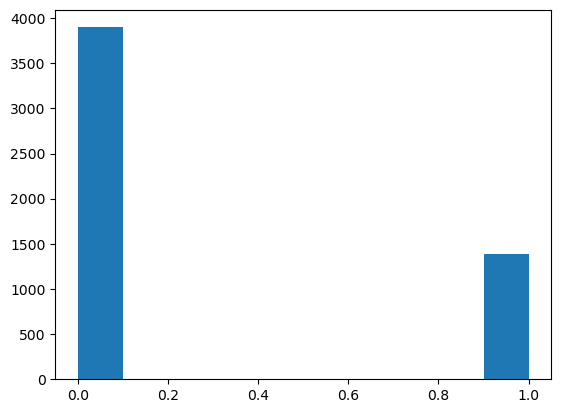

In [7]:
#2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.
plt.hist(data[target_col])
#несбалансированный класс

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [6]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer


<Axes: >

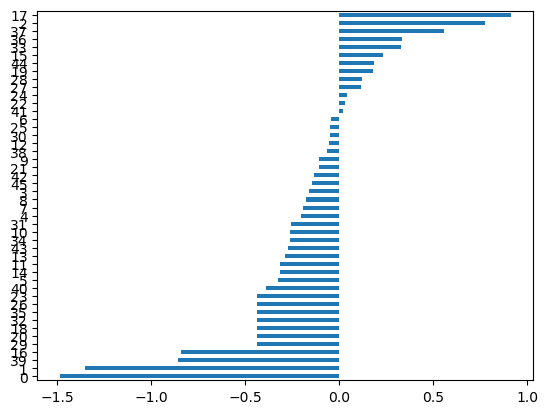

In [84]:

preprocess = ColumnTransformer([('num_imputer', StandardScaler(), num_cols), ('cat_pipeline', OneHotEncoder(), cat_cols)])
lrCV=LogisticRegressionCV(Cs = [100, 10, 1, 0.1, 0.01, 0.001], scoring='roc_auc', refit=True)
pipeline = make_pipeline(preprocess, lrCV)
X_pred = pipeline.fit(data[feature_cols], data[target_col])
coef1=lrCV.coef_
coef1_series=pd.Series(coef1.ravel())
coef1_series.sort_values().plot(kind='barh')


[[0.86203369 0.86209849 0.86206146 0.86024253 0.85561881 0.84894937]
 [0.83699435 0.83699435 0.83665648 0.83580487 0.83263908 0.82670092]
 [0.83451319 0.83451319 0.8343181  0.83437384 0.83304998 0.83228354]
 [0.85606373 0.85605446 0.85638813 0.8565457  0.8560591  0.85185117]
 [0.83566361 0.83566361 0.83538092 0.83368013 0.83017661 0.82724311]]
1
[0]
0.8450648210634653


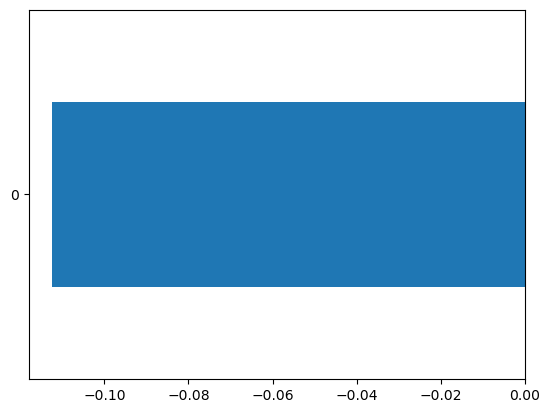

In [85]:
scores=lrCV.scores_[1]
print(scores)
mean_scores=np.mean(scores, axis=0)
best_C_idx=np.where(mean_scores==np.max(mean_scores))[0][0]
best_folds_idx=np.where(scores[:, best_C_idx]==np.max(scores[:, best_C_idx]))[0]
print(best_C_idx)
print(best_folds_idx)

paths=lrCV.coefs_paths_[1]
coefs2=np.squeeze(paths[best_folds_idx, best_C_idx, :])
coefs2=np.mean(coefs2, axis=0)
coefs2_series = pd.Series(coefs2.ravel())
coefs2_series.sort_values().plot(kind='barh')
#best_C=10 and roc_auc=0.8450648210634653
print(mean_scores[1])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [7]:
# YOUR CODE
from catboost import CatBoostClassifier
train_X, valid_X, train_y, valid_y = train_test_split(data[feature_cols], data[target_col], train_size=0.9, random_state=42)
model=CatBoostClassifier(iterations=1000, early_stopping_rounds=50, verbose=True, custom_metric=['AUC'], cat_features=cat_cols)
model.fit(train_X, train_y, eval_set=(valid_X, valid_y))

Learning rate set to 0.046571
0:	learn: 0.6638809	test: 0.6676200	best: 0.6676200 (0)	total: 635ms	remaining: 10m 34s
1:	learn: 0.6427313	test: 0.6475773	best: 0.6475773 (1)	total: 914ms	remaining: 7m 35s
2:	learn: 0.6191565	test: 0.6273540	best: 0.6273540 (2)	total: 1.26s	remaining: 6m 58s
3:	learn: 0.5971243	test: 0.6070074	best: 0.6070074 (3)	total: 1.58s	remaining: 6m 33s
4:	learn: 0.5781326	test: 0.5896059	best: 0.5896059 (4)	total: 1.87s	remaining: 6m 12s
5:	learn: 0.5614773	test: 0.5757802	best: 0.5757802 (5)	total: 2.19s	remaining: 6m 2s
6:	learn: 0.5463159	test: 0.5623335	best: 0.5623335 (6)	total: 2.35s	remaining: 5m 33s
7:	learn: 0.5323966	test: 0.5498696	best: 0.5498696 (7)	total: 2.65s	remaining: 5m 29s
8:	learn: 0.5209079	test: 0.5398025	best: 0.5398025 (8)	total: 2.83s	remaining: 5m 11s
9:	learn: 0.5087529	test: 0.5294427	best: 0.5294427 (9)	total: 3.04s	remaining: 5m
10:	learn: 0.4978255	test: 0.5206550	best: 0.5206550 (10)	total: 3.21s	remaining: 4m 48s
11:	learn: 0.48

In [8]:
params={ 'depth':[1, 2, 3, 4], 'l2_leaf_reg': [0.003, 0.01, 0.03, 0.1], 'learning_rate': [0.003, 0.01, 0.02, 0.03]}
grid_model=CatBoostClassifier(custom_metric=['AUC'], cat_features=cat_cols, iterations=300)
grid_search_result=grid_model.grid_search(params, X=data[feature_cols], y=data[target_col], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6920952	test: 0.6920226	best: 0.6920226 (0)	total: 27.5ms	remaining: 8.23s
1:	learn: 0.6910079	test: 0.6908750	best: 0.6908750 (1)	total: 74.7ms	remaining: 11.1s
2:	learn: 0.6901725	test: 0.6900072	best: 0.6900072 (2)	total: 132ms	remaining: 13s
3:	learn: 0.6891172	test: 0.6888729	best: 0.6888729 (3)	total: 258ms	remaining: 19.1s
4:	learn: 0.6882651	test: 0.6879436	best: 0.6879436 (4)	total: 393ms	remaining: 23.2s
5:	learn: 0.6871875	test: 0.6868271	best: 0.6868271 (5)	total: 448ms	remaining: 22s
6:	learn: 0.6861172	test: 0.6857180	best: 0.6857180 (6)	total: 662ms	remaining: 27.7s
7:	learn: 0.6850670	test: 0.6846275	best: 0.6846275 (7)	total: 714ms	remaining: 26.1s
8:	learn: 0.6842536	test: 0.6837562	best: 0.6837562 (8)	total: 879ms	remaining: 28.4s
9:	learn: 0.6833844	test: 0.6827930	best: 0.6827930 (9)	total: 968ms	remaining: 28.1s
10:	learn: 0.6823705	test: 0.6817472	best: 0.6817472 (10)	total: 1.06s	remaining: 28s
11:	learn: 0.6813843	test: 0.6806896	best: 0.6806896 (11

In [111]:
y_train_pred=model.predict(train_X)
y_val_pred=model.predict(valid_X)
print("Training ROC-AUC:", roc_auc_score(train_y, y_train_pred))
print("Validation ROC-AUC:", roc_auc_score(valid_y, y_val_pred))

Training ROC-AUC: 0.7350222074793434
Validation ROC-AUC: 0.6473007712082262


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [16]:
best_model =CatBoostClassifier(iterations=3000, early_stopping_rounds=50, custom_metric=['AUC'], cat_features=cat_cols, depth=1, l2_leaf_reg=0.003, learning_rate=0.03)
best_model.fit(train_X, train_y, eval_set=(valid_X, valid_y))

0:	learn: 0.6821167	test: 0.6828267	best: 0.6828267 (0)	total: 43.9ms	remaining: 2m 11s
1:	learn: 0.6715503	test: 0.6728565	best: 0.6728565 (1)	total: 80ms	remaining: 1m 59s
2:	learn: 0.6616938	test: 0.6635688	best: 0.6635688 (2)	total: 115ms	remaining: 1m 55s
3:	learn: 0.6533258	test: 0.6559501	best: 0.6559501 (3)	total: 142ms	remaining: 1m 46s
4:	learn: 0.6444503	test: 0.6477279	best: 0.6477279 (4)	total: 190ms	remaining: 1m 53s
5:	learn: 0.6363336	test: 0.6400937	best: 0.6400937 (5)	total: 295ms	remaining: 2m 27s
6:	learn: 0.6286484	test: 0.6330903	best: 0.6330903 (6)	total: 337ms	remaining: 2m 24s
7:	learn: 0.6214257	test: 0.6265577	best: 0.6265577 (7)	total: 385ms	remaining: 2m 24s
8:	learn: 0.6151709	test: 0.6204423	best: 0.6204423 (8)	total: 468ms	remaining: 2m 35s
9:	learn: 0.6088050	test: 0.6146526	best: 0.6146526 (9)	total: 541ms	remaining: 2m 41s
10:	learn: 0.6037821	test: 0.6096305	best: 0.6096305 (10)	total: 640ms	remaining: 2m 53s
11:	learn: 0.5981209	test: 0.6046015	best

In [17]:
X_test = pd.read_csv('1_test.csv')
submission = pd.read_csv('1_submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('1_submission.csv', index=False)
# prob = model.predict_proba(X_test)[:,1]
# print(prob)

Лучшее решение отправьте в Stepik.